In [1]:
from PIL import Image
import cv2

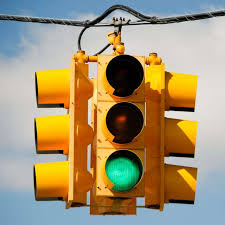

In [2]:
P_image = Image.open("test_images/test1.jpg")
P_image

In [3]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)


In [3]:
import numpy as np


In [13]:
image_np_expanded = np.expand_dims(a, axis=0)
image_np_expanded

array([[[[ 64, 115, 158],
         [ 65, 116, 159],
         [ 65, 116, 159],
         ...,
         [110, 153, 188],
         [113, 156, 191],
         [110, 153, 187]],

        [[ 65, 116, 159],
         [ 65, 116, 159],
         [ 66, 117, 160],
         ...,
         [110, 152, 190],
         [112, 154, 192],
         [109, 151, 189]],

        [[ 66, 117, 160],
         [ 66, 117, 160],
         [ 66, 117, 160],
         ...,
         [108, 152, 191],
         [110, 154, 193],
         [108, 150, 190]],

        ...,

        [[117, 156, 185],
         [117, 156, 185],
         [118, 157, 186],
         ...,
         [142, 176, 203],
         [142, 176, 203],
         [142, 176, 203]],

        [[117, 156, 185],
         [117, 156, 185],
         [118, 157, 186],
         ...,
         [142, 176, 203],
         [142, 176, 203],
         [142, 176, 203]],

        [[116, 155, 184],
         [117, 156, 185],
         [117, 156, 185],
         ...,
         [142, 176, 203],
        

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

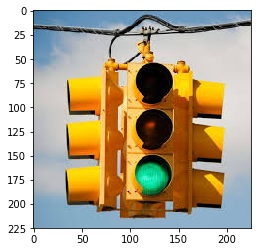

In [8]:
plt.imshow(a)

In [5]:
frame = cv2.imread("test_images/test3.jpg")

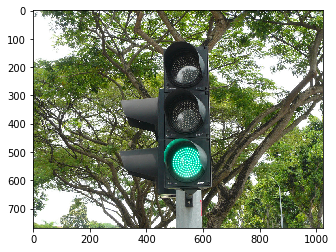

In [6]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [7]:
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

In [8]:
from scipy.stats import pearsonr as pho
from scipy.spatial.distance import euclidean as eDist
import time
import numpy as np
import os
import six.moves.urllib as urllib
import tarfile
import tensorflow as tf
from matplotlib import pyplot as plt
from PIL import Image
from os import path
from utils import label_map_util
from utils import visualization_utils as vis_util
import time
import cv2


E:\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:

def detect_traffic_lights(image_cv2,plot_flag=False):
    """
    Detect traffic lights and draw bounding boxes around the traffic lights
    :param PATH_TO_TEST_IMAGES_DIR: testing image directory
    :param MODEL_NAME: name of the model used in the task
    :return: commands: True: go, False: stop
    """

    #--------test images------
    # TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'img_{}.jpg'.format(i)) for i in range(1, Num_images+1) ]
    # TEST_IMAGE_PATHS = [ 'test_images/test3.jpg','test_images/test2.jpg']

    commands = [0]

    # Path to frozen detection graph. This is the actual model that is used for the object detection.
    PATH_TO_CKPT = 'ssdlite_mobilenet_v2_coco_2018_05_09/frozen_inference_graph.pb'

    # List of the strings that is used to add correct label for each box.
    PATH_TO_LABELS = 'mscoco_label_map.pbtxt'

    # number of classes for COCO dataset
    NUM_CLASSES = 90

    #--------Load a (frozen) Tensorflow model into memory
    detection_graph = tf.Graph()
    with detection_graph.as_default():
      od_graph_def = tf.GraphDef()
      with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


    #----------Loading label map
    label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
    categories = label_map_util.convert_label_map_to_categories(label_map,
                                                                max_num_classes=NUM_CLASSES,
                                                                use_display_name=True)
    category_index = label_map_util.create_category_index(categories)


    with detection_graph.as_default():
        with tf.Session(graph=detection_graph) as sess:
            # Definite input and output Tensors for detection_graph
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            # Each box represents a part of the image where a particular object was detected.
            detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            # Each score represent how level of confidence for each of the objects.
            # Score is shown on the result image, together with the class label.
            detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
            detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')

            
            # image = Image.open(image_cv2)
#             image = Image.fromarray(image_cv2)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
#             image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_cv2, axis=0)
            print (image_np_expanded.shape)
            # Actual detection.
            (boxes, scores, classes, num) = sess.run(
              [detection_boxes, detection_scores, detection_classes, num_detections],
              feed_dict={image_tensor: image_np_expanded})

            print (boxes, scores, classes, num)
            # red_flag = read_traffic_lights(image, np.squeeze(boxes), np.squeeze(scores), np.squeeze(classes).astype(np.int32))
            # if red_flag:
                # commands.append(False)
            # else:
                # commands.append(True)

            # Visualization of the results of a detection.
            if plot_flag:
                plot_origin_image(image_np, boxes, classes, scores, category_index)

    return boxes, scores, classes, num

In [49]:
boxes1, scores1, classes1, num1 = detect_traffic_lights(frame)

(1, 768, 1024, 3)
[[[0.13450572 0.4325703  0.8253865  0.61322236]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.      

100

In [17]:
boxes[0][0].tolist()

[0.1345057189464569,
 0.43257030844688416,
 0.8253865242004395,
 0.6132223606109619]

In [18]:
ymin, xmin, ymax, xmax = boxes[0][0].tolist()

In [21]:
im_width=1024
im_height = 768
left, right, top, bottom = map(lambda x:int(x),[xmin * im_width, xmax * im_width,ymin * im_height, ymax * im_height])

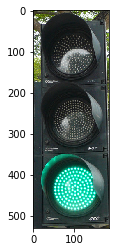

In [24]:
ff = frame[top:bottom,left:right,:]
plt.imshow(ff)

In [25]:
print (left, right, top, bottom )

442 627 103 633


In [26]:
print ((bottom-top)/(right-left))

2.864864864864865


In [34]:
def detect_green(frame,threshold):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower = np.array([34,60,60], dtype=np.uint8)
    upper = np.array([84, 255, 255], dtype=np.uint8)
    mask = cv2.inRange(hsv, lower, upper)
    rate = np.count_nonzero(mask) / (mask.shape[0] * mask.shape[1])
    return rate>=threshold

In [40]:
None is False

False

In [35]:
def detect_red(frame,threshold):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # lower mask (0-10)
    lower_red = np.array([0,70,50])
    upper_red = np.array([10,255,255])
    mask0 = cv2.inRange(hsv, lower_red, upper_red)

    # upper mask (170-180)
    lower_red = np.array([170,70,50])
    upper_red = np.array([180,255,255])
    mask1 = cv2.inRange(hsv, lower_red, upper_red)
    
    mask = mask0+mask1
    rate = np.count_nonzero(mask) / (mask.shape[0] * mask.shape[1])
    return rate>=threshold

In [29]:
def detect_magenta(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower = np.array([135,60,60], dtype=np.uint8)
    upper = np.array([165, 255, 255], dtype=np.uint8)
    mask = cv2.inRange(hsv, lower, upper)
    return mask

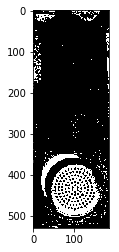

In [30]:
plt.imshow(detect_green(ff),cmap='gray')

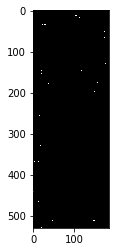

In [31]:
plt.imshow(detect_red(ff),cmap='gray')

In [37]:
def traffic_signal_detection(frame,top,bottom,left,right,num=3,threshold=0.2):
    # if both red/green fail to pass the threshold, that means no traffic light is on, return None
    # if it has both red and green signal, something is wrong, return stop
#     ff = frame[top:bottom,left:right,:]
    height = bottom - top
    step_size = int(height/num)
    red_signal_part = frame[top:top+step_size,left:right,:]
    green_signal_part = frame[bottom-step_size:bottom,left:right,:]    
    green_flag = detect_green(green_signal_part,threshold)
    red_flag = detect_red(red_signal_part,threshold)
    if red_flag:
        return False
    if green_flag:
        return True
    return None

In [46]:
frame.shape

(768, 1024, 3)

In [47]:
def traffic_light_extraction(frame,boxes, scores, classes):
    go_flag = False
    im_width=frame.shape[1]
    im_height = frame.shape[0]    
    for i in range(len(classes[0])):
        if not scores[0][i] > 0.5:
            continue
        if not classes[0][i] == 10:
            continue
        ymin, xmin, ymax, xmax = boxes[0][i].tolist()
        left, right, top, bottom = map(lambda x:int(x),[xmin * im_width, xmax * im_width,ymin * im_height, ymax * im_height])
        if traffic_signal_detection(frame,top,bottom,left,right,num=3,threshold=0.2):
            go_flag = True
    return go_flag     

In [48]:
traffic_light_extraction(frame,boxes, scores, classes)

True

In [38]:
traffic_signal_detection(frame,top,bottom,left,right,num=3,threshold=0.2)

True

In [23]:
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

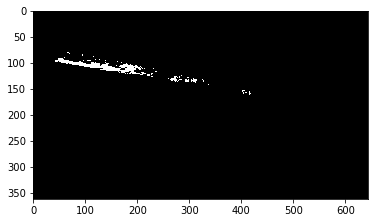

In [32]:
r1 = np.array([150,0,130], dtype=np.uint8)
r2 = np.array([255, 100, 255], dtype=np.uint8)
mask1 = cv2.inRange(frame, r1, r2)
plt.imshow(mask1,cmap='gray')

In [17]:
image_np_expanded.shape

(1, 225, 225, 3)

In [18]:
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

In [19]:
np.expand_dims(frame, axis=0).shape

(1, 225, 225, 3)

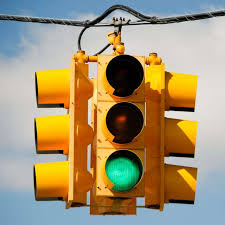

In [20]:
Image.fromarray(frame)